In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [30]:

df = pd.read_csv('olympics-economics.csv')


df.head()

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6
4,France,FRA,16,26,22,64,44460.82,2023,68.2


Análise Exploratória de Dados (EDA)
Vamos começar por explorar os dados para entender melhor sua distribuição e identificar possíveis outliers:

            gold     silver     bronze       total            gdp  \
count  90.000000  90.000000  90.000000   90.000000      90.000000   
mean    3.644444   3.633333   4.255556   11.533333   24478.053556   
std     7.018933   6.797967   6.586607   19.782071   25547.857382   
min     0.000000   0.000000   0.000000    1.000000    1014.210000   
25%     0.000000   0.000000   1.000000    2.000000    5815.180000   
50%     1.000000   1.000000   2.000000    5.000000   13061.185000   
75%     3.000000   3.000000   5.000000    9.000000   34484.677500   
max    40.000000  44.000000  42.000000  126.000000  103684.880000   

          gdp_year   population  
count    90.000000    90.000000  
mean   2022.977778    69.027778  
std       0.148231   213.286437  
min    2022.000000     0.100000  
25%    2023.000000     5.325000  
50%    2023.000000    12.150000  
75%    2023.000000    48.550000  
max    2023.000000  1428.600000  


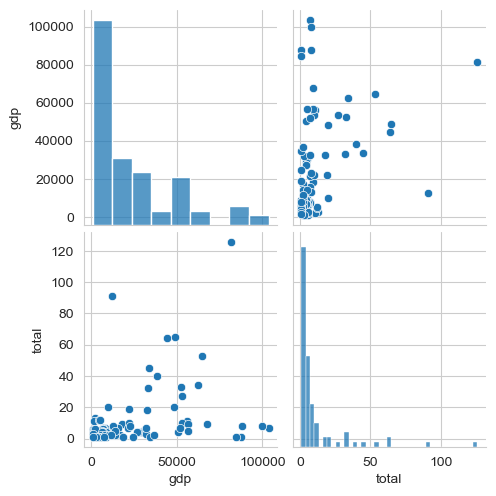

In [31]:
# Resumo estatístico
print(df.describe())

# Visualização da distribuição do PIB e do número total de medalhas
sns.pairplot(df[['gdp', 'total']])
plt.show()

Respondendo às Perguntas
1. Um PIB mais elevado está correlacionado com mais medalhas olímpicas?

Para responder a essa pergunta, podemos calcular a correlação de Pearson entre o PIB e o número total de medalhas:

In [32]:
corr, _ = pearsonr(df['gdp'], df['total'])
print('Correlação entre PIB e total de medalhas:', corr)

Correlação entre PIB e total de medalhas: 0.34794157444147755


Se a correlação for próxima de 1, há uma forte correlação positiva. Se for próxima de -1, a correlação é negativa. Se for próxima de 0, não há correlação linear.


2. Existem países com desempenho melhor do que o esperado com base na sua situação económica?

Para identificar países que superam ou subdesempenham em relação ao seu PIB, podemos criar um novo DataFrame com uma coluna adicional que represente a diferença entre o número de medalhas esperado (baseado em uma regressão linear entre PIB e medalhas) e o número de medalhas real.

In [33]:
# Regressão linear simples
from sklearn.linear_model import LinearRegression
X = df[['gdp']]
y = df['total']
model = LinearRegression().fit(X, y)
df['medals_esperadas'] = model.predict(X)
df['diferenca'] = df['total'] - df['medals_esperadas']

Em seguida, podemos plotar um gráfico de dispersão com a diferença em relação ao PIB para identificar os outliers.

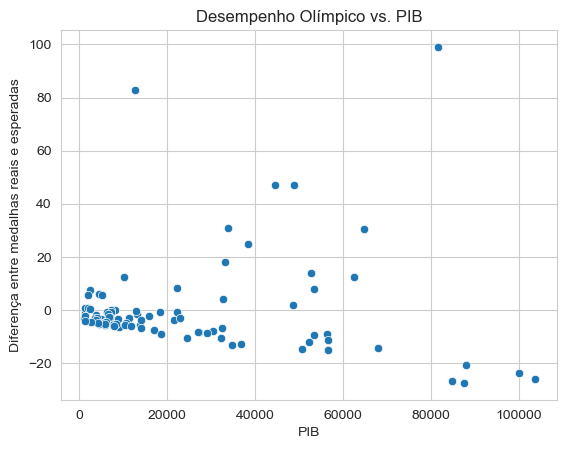

In [34]:
# Gráfico de dispersão com a diferença
sns.scatterplot(x='gdp', y='diferenca', data=df)
plt.xlabel('PIB')
plt.ylabel('Diferença entre medalhas reais e esperadas')
plt.title('Desempenho Olímpico vs. PIB')
plt.show()

Distribuição De Medalhas

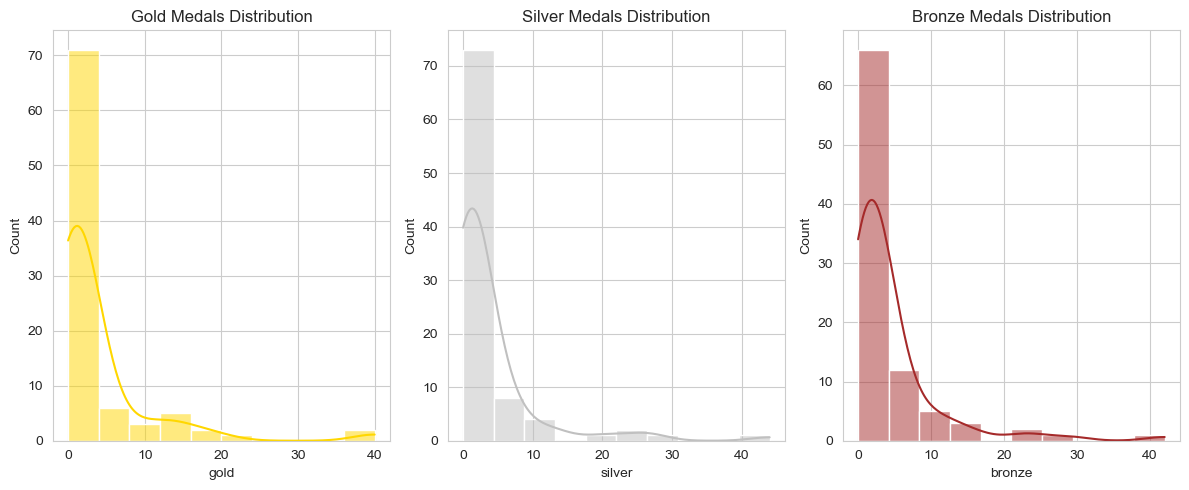

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('olympics-economics.csv')



plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['gold'], bins=10, kde=True, color='gold')
plt.title('Gold Medals Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['silver'], bins=10, kde=True, color='silver')
plt.title('Silver Medals Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['bronze'], bins=10, kde=True, color='brown')
plt.title('Bronze Medals Distribution')

plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('olympics-economics.csv')


df['total_medals'] = df['gold'] + df['silver'] + df['bronze']


top_20_countries = df.sort_values(by='total_medals', ascending=False).head(20)


top_20_countries.head(20)

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population,total_medals
0,United States,USA,40,44,42,126,81695.19,2023,334.9,126
1,China,CHN,40,27,24,91,12614.06,2023,1410.7,91
6,Great Britain,GBR,14,22,29,65,48866.60,2023,68.3,65
4,France,FRA,16,26,22,64,44460.82,2023,68.2,64
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6,53
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5,45
8,Italy,ITA,12,13,15,40,38373.17,2023,58.8,40
5,Netherlands,NLD,15,7,12,34,62536.73,2023,17.9,34
9,Germany,DEU,12,13,8,33,52745.76,2023,84.5,33
7,South Korea,KOR,13,9,10,32,33121.37,2023,51.7,32


C:\Users\guilherme.lima\AppData\Local\Temp\ipykernel_4976\2191746129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='total_medals', data=top_20_countries, palette='viridis')


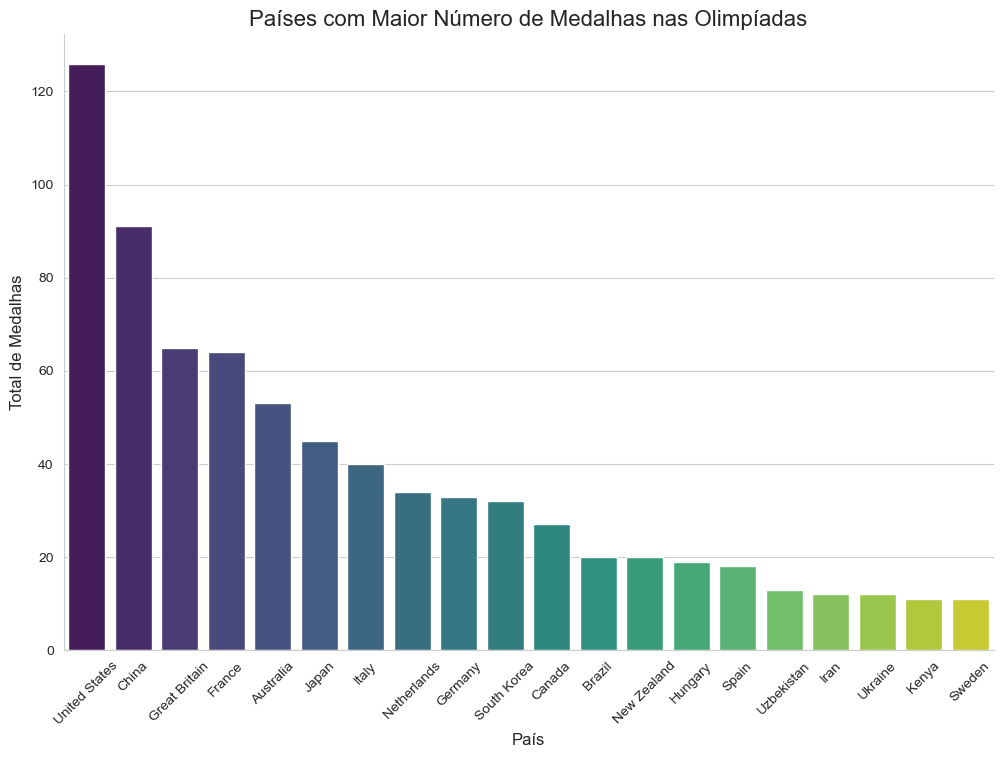

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (seu código anterior)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x='country', y='total_medals', data=top_20_countries, palette='viridis')
plt.title('Países com Maior Número de Medalhas nas Olimpíadas', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Medalhas', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.show()

Medalhas por capita

Medalhas por capita é uma métrica que compara o número total de medalhas conquistadas por um país em relação à sua população. Essa medida nos permite ter uma ideia mais precisa do desempenho esportivo de um país, controlando o fator tamanho da população. Por exemplo, um país pequeno que conquista muitas medalhas tem um desempenho proporcionalmente maior do que um país grande com o mesmo número total de medalhas.

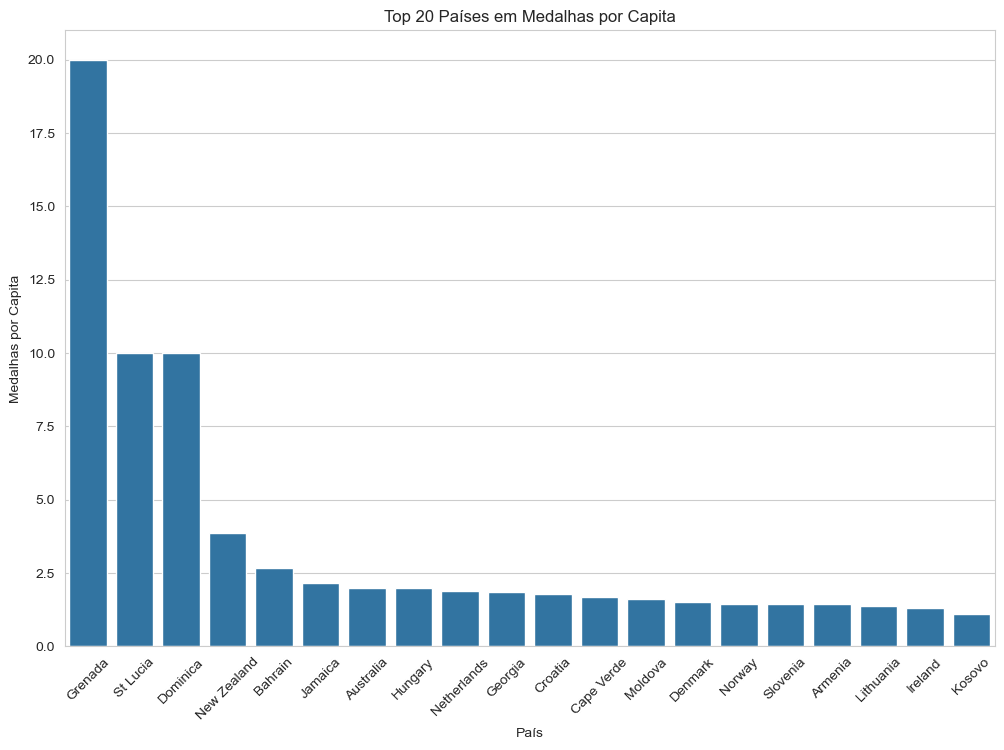

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('olympics-economics.csv')


df['medals_per_capita'] = df['total'] / df['population']


top_20_countries_per_capita = df.sort_values(by='medals_per_capita', ascending=False).head(20)


plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='medals_per_capita', data=top_20_countries_per_capita)
plt.title('Top 20 Países em Medalhas por Capita')
plt.xlabel('País')
plt.ylabel('Medalhas por Capita')
plt.xticks(rotation=45)
plt.show()

Medalhas Olímpicas e PIB: Uma Análise Visual

Entendendo a Relação

É comum observar uma correlação entre o desempenho esportivo de um país, especialmente nas Olimpíadas, e seu Produto Interno Bruto (PIB). Países com economias mais fortes tendem a investir mais em infraestrutura esportiva, programas de treinamento e desenvolvimento de atletas, o que pode resultar em um maior número de medalhas.

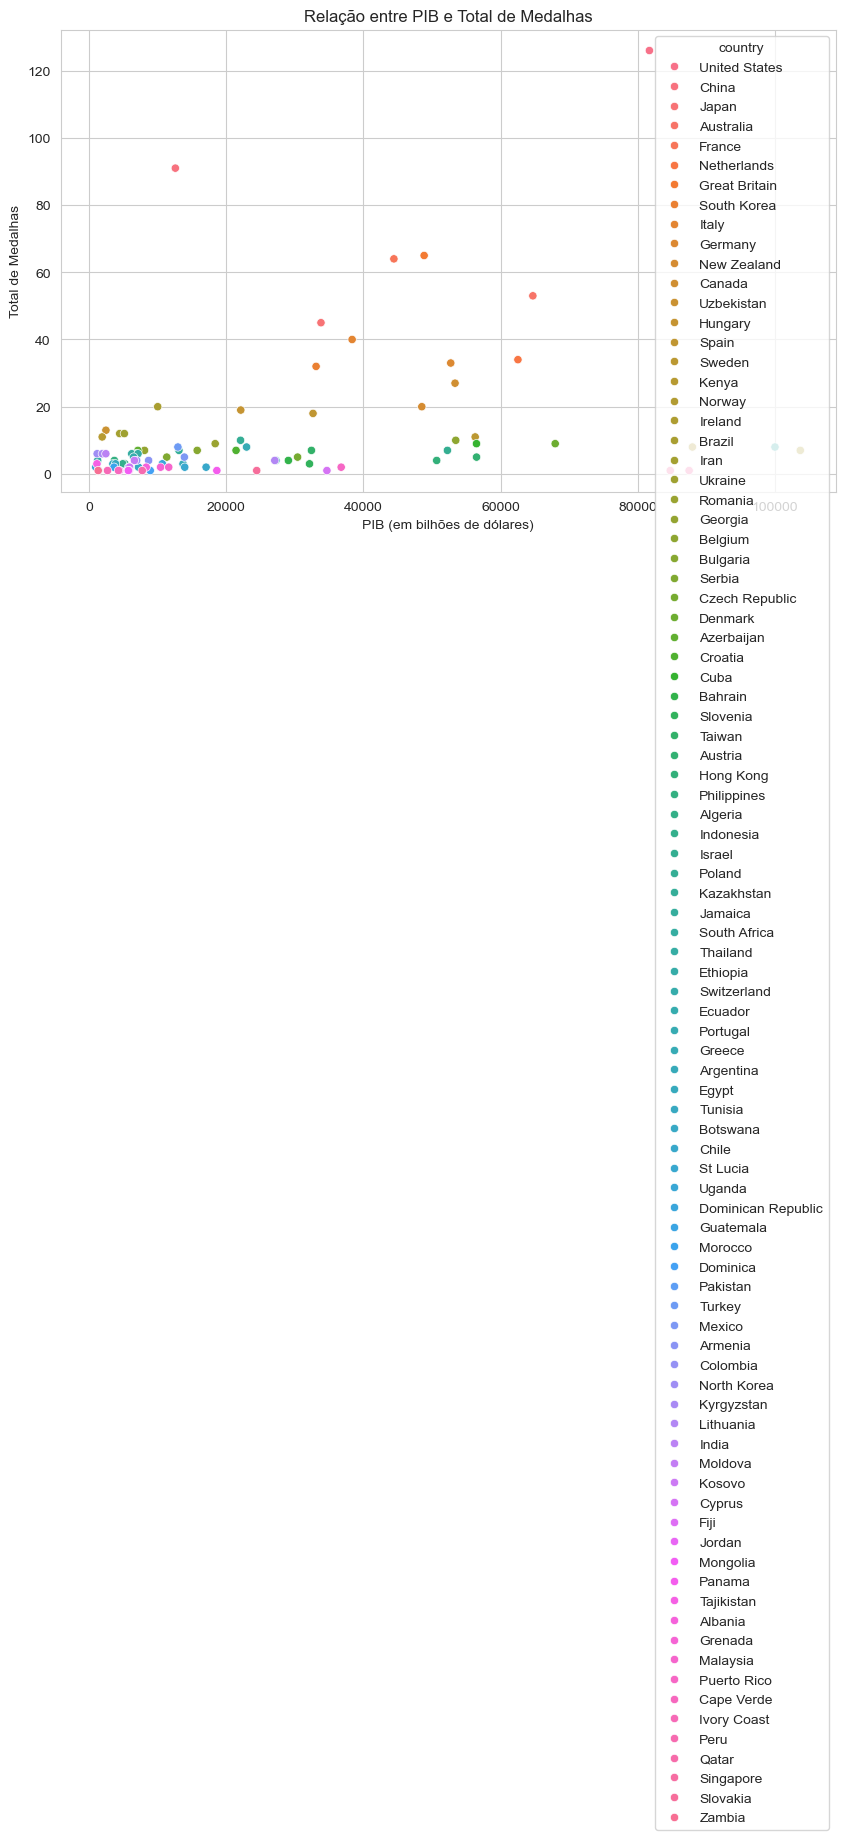

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (substitua 'olympics_economics.csv' pelo seu arquivo)
df = pd.read_csv('olympics-economics.csv')

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='total', data=df, hue='country')  # Adiciona cor por região (opcional)
plt.title('Relação entre PIB e Total de Medalhas')
plt.xlabel('PIB (em bilhões de dólares)')
plt.ylabel('Total de Medalhas')
plt.show()